# 1. Classification

In [29]:
# Import modules
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits = datasets.load_digits()

In [7]:
# Create data and label arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# KNN

In [5]:
for i in range(1, 8):
  kNN = KNeighborsClassifier(n_neighbors = 3)
  kNN.fit(X_train, y_train)
  print(kNN.score(X_train, y_train))
  print(kNN.score(X_test, y_test))

0.9923451635351427
0.9777777777777777
0.9923451635351427
0.9777777777777777
0.9923451635351427
0.9777777777777777
0.9923451635351427
0.9777777777777777
0.9923451635351427
0.9777777777777777
0.9923451635351427
0.9777777777777777
0.9923451635351427
0.9777777777777777


In [6]:
# Linear Kernel
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.95      0.97      0.96        36
           2       0.95      1.00      0.97        37
           3       1.00      0.93      0.96        28
           4       1.00      1.00      1.00        40
           5       0.93      0.97      0.95        29
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        41
           8       0.98      0.95      0.96        43
           9       0.94      0.94      0.94        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



<Axes: >

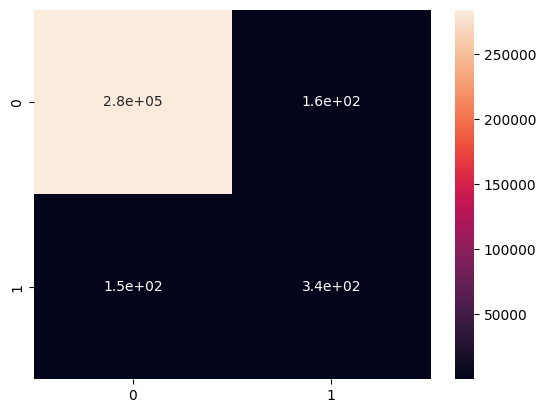

In [46]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)

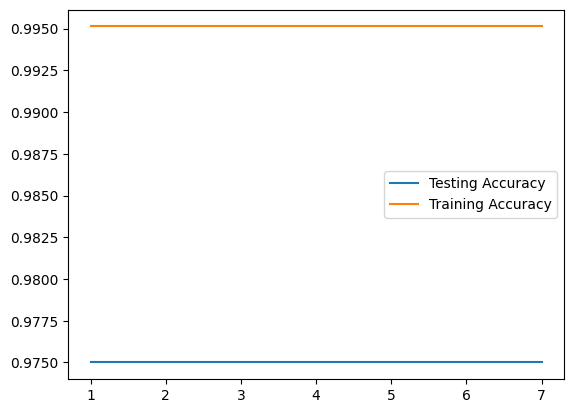

In [50]:
#kNN Classifier
number_neighbors = []
testing_scores = []
training_scores = []

# For loop: we loop 8 times as the number of neighbours:
for i in range(1, 8):
  kNN = KNeighborsClassifier(n_neighbors = 3)
  kNN.fit(X_train, y_train)
  number_neighbors.append(i)
  training_scores.append(kNN.score(X_train, y_train))
  testing_scores.append(kNN.score(X_test, y_test))

plt.plot(number_neighbors, testing_scores, label="Testing Accuracy")
plt.plot(number_neighbors, training_scores, label="Training Accuracy")
plt.legend()

In this case, K = 2 looks best

# Kernels

In [11]:
# SVM/SVC Classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(kernel)
    print(classification_report(y_test, y_pred))

linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        37
           3       1.00      0.96      0.98        28
           4       1.00      0.97      0.99        40
           5       0.96      0.93      0.95        29
           6       0.97      1.00      0.99        36
           7       1.00      1.00      1.00        41
           8       0.95      0.98      0.97        43
           9       0.97      0.97      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        37
           3

The linear and poly kernals look the best

# Naive Bayes

Text(50.722222222222214, 0.5, 'True label')

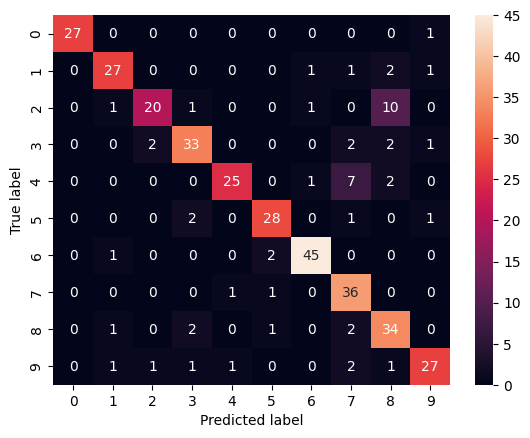

In [51]:
# Naive Bayes
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True, fmt="d")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

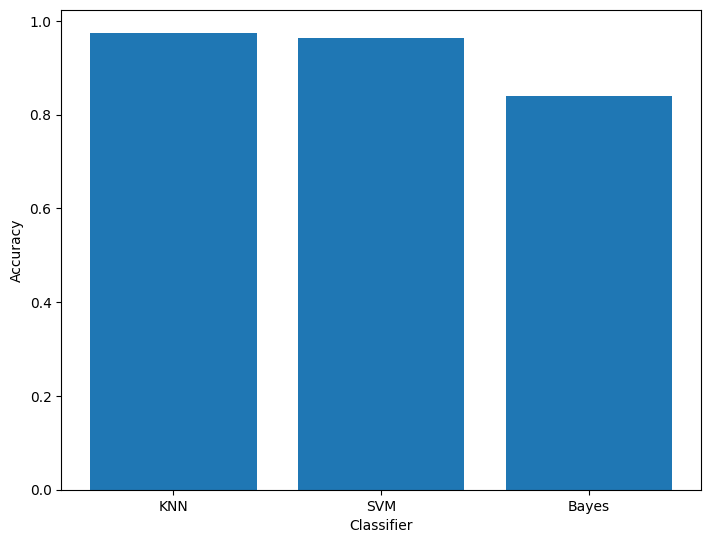

In [60]:
# Compare the accuracy of different classifiers in the same plot.
scores = []
labels = ["KNN", "SVM", "Bayes"]
classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='linear'),
    GaussianNB()
]

# for each classifier in the list of above classifier
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  scores.append(classifier.score(X_test, y_test))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,scores)
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
plt.show()

# 2. Regression

In [40]:
# Load gapminder
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<ipython-input-41-b7195881e861>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdYlGn")


<Axes: >

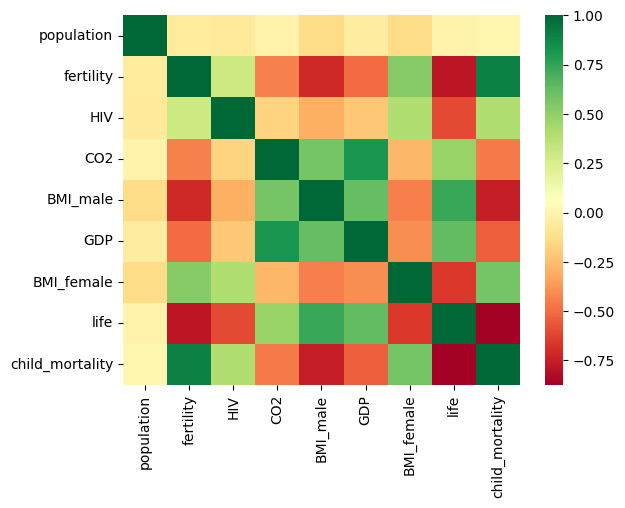

In [41]:
# Heatmap
sns.heatmap(df.corr(), cmap="RdYlGn")

<ipython-input-14-785583e973c1>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
<ipython-input-14-785583e973c1>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))
<ipython-input-14-785583e973c1>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')


0.6192442167740035


Text(0, 0.5, 'Life Expectency')

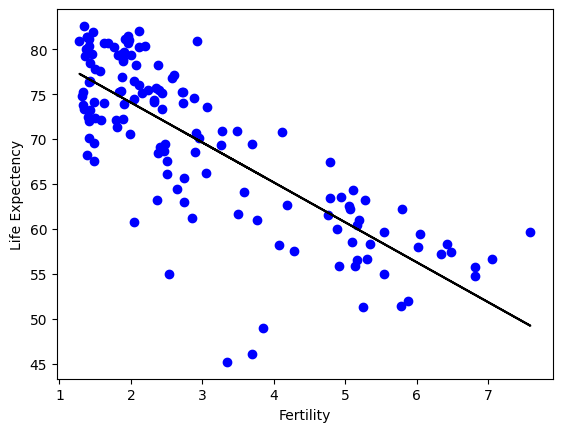

In [14]:
# Linear Regression
x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')
plt.xlabel("Fertility")
plt.ylabel("Life Expectency")

In [15]:
X = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

<ipython-input-16-00a7fe77c36b>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression_all.fit(x[:, None], y)
<ipython-input-16-00a7fe77c36b>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression_all.score(x[:, None], y))
<ipython-input-16-00a7fe77c36b>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')


0.6192442167740035


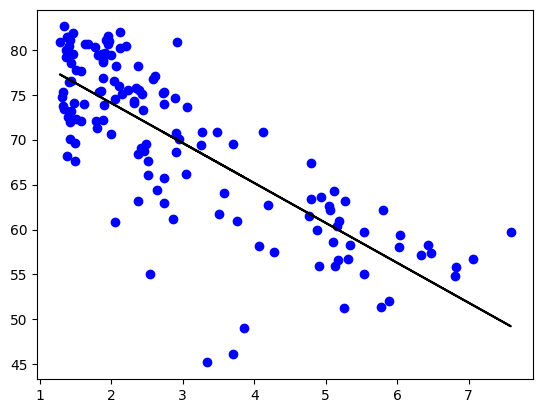

In [16]:
# Linear regression on all
X = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

regression_all = LinearRegression()
regression_all.fit(x[:, None], y)
print(regression_all.score(x[:, None], y))

fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')

In [17]:
# Cross validation score
print(cross_val_score(regression, x[:, None], y, cv = 5))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


<ipython-input-17-06d705c9a718>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(cross_val_score(regression, x[:, None], y, cv = 5))


# Logistic Regression

In [34]:
# Load creditcard
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


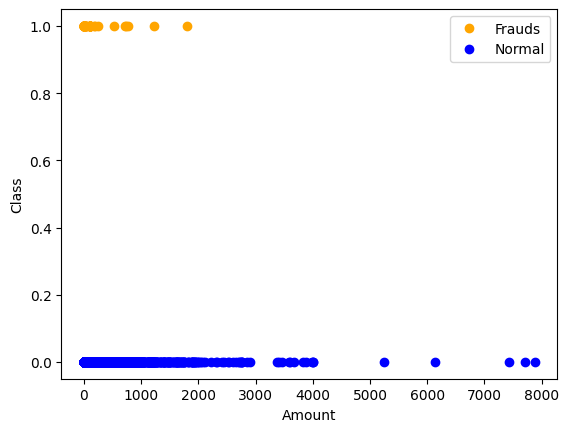

In [19]:
# Class and amount comparison
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'bo', label="Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

All the fraud cases occur at low amounts

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[284157    158]
 [   151    341]]


Text(50.722222222222214, 0.5, 'True label')

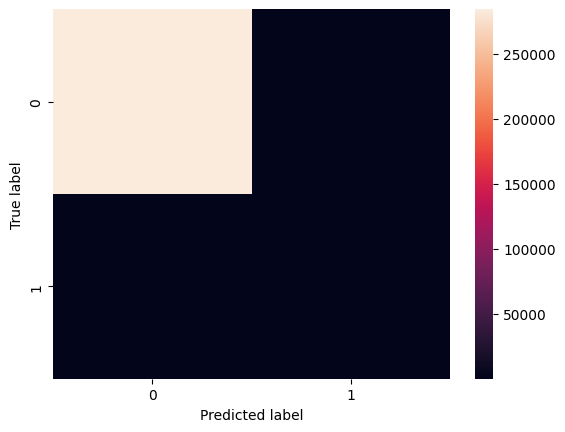

In [35]:
# Logistic Regression
X = df.drop("Class", axis=1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

ax = sns.heatmap(conf_matrix)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")